In [1]:
import sys
sys.path.append('C:\\Users\\nigel\\OneDrive\\Desktop\\VS Code\\vasp-job-automation')
import os
import pandas as pd
import src.workflows as workflows
import src.eos_fit as eos_fit


C:\Users\nigel\AppData\Local\Temp\ipykernel_32176\2648357645.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
configurations_dir = "C:\\Users\\nigel\\OneDrive\\Desktop\\Pb"
config_dirs = [os.path.join(configurations_dir, d) for d in os.listdir(configurations_dir) 
               if os.path.isdir(os.path.join(configurations_dir, d))]
print(config_dirs)

['C:\\Users\\nigel\\OneDrive\\Desktop\\Pb\\config_NCC', 'C:\\Users\\nigel\\OneDrive\\Desktop\\Pb\\config_SCC1']


In [4]:
df_list = []
for config_dir in config_dirs:
    try:
        config_df = workflows.extract_configuration_data(config_dir, outcar_name='OUTCAR.3static', 
                                                         oszicar_name='OSZICAR.3static', contcar_name='CONTCAR.3static', 
                                                         collect_mag_data=False)
        df_list.append(config_df)
    except Exception as e:
        print(f'Error in {config_dir}: {e}')
df = pd.concat(df_list, ignore_index=True)
print(df)
print(type(df))


    volume config     energy  number_of_atoms
0   1000.0    NCC -112.80076               32
1    990.0    NCC -112.70017               32
2    900.0    NCC -110.34674               32
3    890.0    NCC -109.88163               32
4    880.0    NCC -109.37180               32
..     ...    ...        ...              ...
57   950.0   SCC1 -112.85227               32
58   940.0   SCC1 -112.59947               32
59   930.0   SCC1 -112.31160               32
60   920.0   SCC1 -111.98497               32
61   910.0   SCC1 -111.60702               32

[62 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [15]:
df.to_json('16_atoms_or_less_ev_configuration_data_',orient='records')

In [95]:
df['number_of_atoms'] = df['number_of_atoms']/2
df2 = df[df['config'] != '183']
df3 = df[df['config'] != '181']
print(df)

      # of ion    tot  volume config     energy  number_of_atoms
0            1 -2.926   145.0     15 -115.43673              4.0
1            2 -2.926   145.0     15 -115.43673              4.0
2            3  2.926   145.0     15 -115.43673              4.0
3            4  2.926   145.0     15 -115.43673              4.0
4            5  0.000   145.0     15 -115.43673              4.0
...        ...    ...     ...    ...        ...              ...
1843         4  3.116   185.0      9 -115.76381              4.0
1844         5  0.000   185.0      9 -115.76381              4.0
1845         6  0.000   185.0      9 -115.76381              4.0
1846         7  0.000   185.0      9 -115.76381              4.0
1847         8  0.000   185.0      9 -115.76381              4.0

[1768 rows x 6 columns]


In [62]:
volume_min = 240
df = df[df['volume'] >= volume_min]
print(df)


    volume     config     energy  number_of_atoms
13  240.78  bcc_shang -172.81491               16
14  242.99  bcc_shang -173.02384               16
15  245.22  bcc_shang -173.19093               16
16  246.71  bcc_shang -173.28080               16
17  248.21  bcc_shang -173.35436               16
18  250.47  bcc_shang -173.43398               16
19  252.74  bcc_shang -173.47490               16
20  254.27  bcc_shang -173.48401               16
21  255.79  bcc_shang -173.47862               16
22  258.10  bcc_shang -173.41402               16
23  261.97  bcc_shang -173.27420               16
24  269.83  bcc_shang -172.74393               16
25  277.84  bcc_shang -171.91588               16


In [63]:
df_both = pd.concat([df,df_2])
print(df_both)

    volume     config     energy  number_of_atoms
13  240.78  bcc_shang -172.81491               16
14  242.99  bcc_shang -173.02384               16
15  245.22  bcc_shang -173.19093               16
16  246.71  bcc_shang -173.28080               16
17  248.21  bcc_shang -173.35436               16
18  250.47  bcc_shang -173.43398               16
19  252.74  bcc_shang -173.47490               16
20  254.27  bcc_shang -173.48401               16
21  255.79  bcc_shang -173.47862               16
22  258.10  bcc_shang -173.41402               16
23  261.97  bcc_shang -173.27420               16
24  269.83  bcc_shang -172.74393               16
25  277.84  bcc_shang -171.91588               16
0   261.89        bcc -173.28617               16
1   259.35        bcc -173.38364               16
2   256.81        bcc -173.45769               16
3   255.54        bcc -173.47168               16
4   254.77        bcc -173.47469               16
5   254.27        bcc -173.47505               16


In [64]:
import importlib
importlib.reload(eos_fit)

fig = eos_fit.plot_ev(df_both, 'BM4', highlight_minimum=True, per_atom=False, show_fig=False)

fig.update_layout(title_text='E-V Mo BCC',
                  xaxis_title='Volume (Å<sup>3</sup>/atom.)',
                  yaxis_title='Energy (eV/atom)')


In [98]:
selection_dict = {'1': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                  '3': [4, 5, 6, 7, 8, 9, 10, 11],
                    '5': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '6': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '7': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '8': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                    '9': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                    '10': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '11': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '12': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '13': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '14': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '16': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '17': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '18': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '21': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '23': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '9c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '10c': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                    '11c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '12c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '13c': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                    '14c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '15c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '16c': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                    '17c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '18c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '19c': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                    '20c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '21c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '23c': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                    '26c': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                    '28c': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

selected_df = eos_fit.select_data(df, selection_dict)

      # of ion    tot  volume config     energy  number_of_atoms  volume_rank
0            1 -2.926   145.0     15 -115.43673              4.0            1
1            2 -2.926   145.0     15 -115.43673              4.0            1
2            3  2.926   145.0     15 -115.43673              4.0            1
3            4  2.926   145.0     15 -115.43673              4.0            1
4            5  0.000   145.0     15 -115.43673              4.0            1
...        ...    ...     ...    ...        ...              ...          ...
1843         4  3.116   185.0      9 -115.76381              4.0           15
1844         5  0.000   185.0      9 -115.76381              4.0           15
1845         6  0.000   185.0      9 -115.76381              4.0           15
1846         7  0.000   185.0      9 -115.76381              4.0           15
1847         8  0.000   185.0      9 -115.76381              4.0           15

[1768 rows x 7 columns]


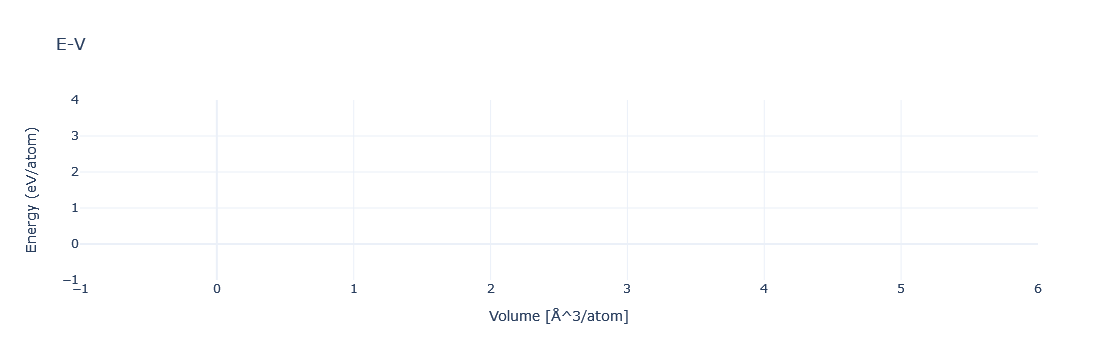

Empty DataFrame
Columns: [# of ion, tot, volume, config, energy, number_of_atoms]
Index: []


In [15]:
#selected_configs = ['6']

#config_df = selected_df[selected_df['config'].isin(selected_configs)]
#eos_fit.plot_ev(config_df, 'BM4', highlight_minimum=True, show_fig=True)

config_df_unselected = df[df['config'] == '9']
eos_fit.plot_ev(config_df_unselected, 'BM4', highlight_minimum=True, per_atom=True, show_fig=True)
print(config_df_unselected)

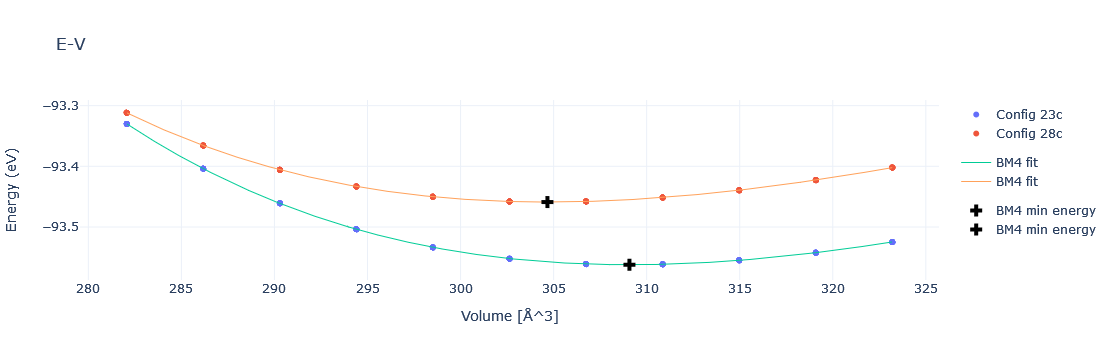

In [44]:
multiple_ev_fig = eos_fit.plot_ev(selected_df, eos_fitting='BM4', show_fig=True)


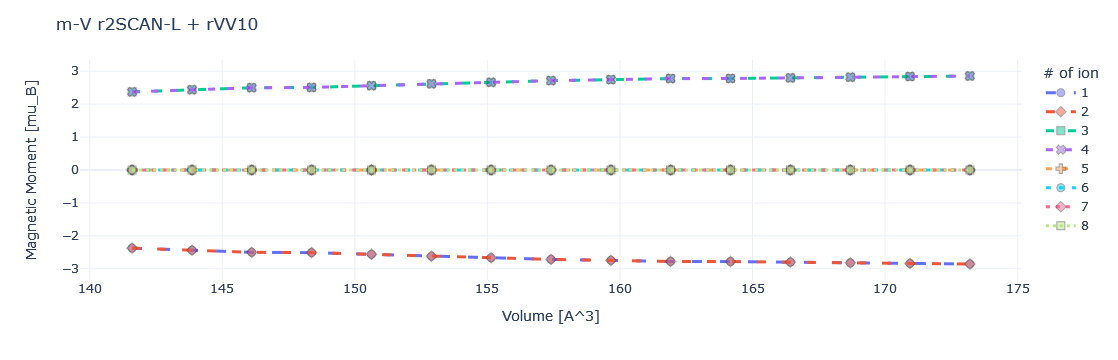

In [21]:
# plot mv for each config

# for config in df['config'].unique():
#     config_df = df[df['config'] == config]
#     fig = eos_fit.plot_mv(config_df, show_fig=True)

config_df = df[df['config'] == '8']
fig = eos_fit.plot_mv(config_df, show_fig=False)
fig.update_layout(title_text='m-V r2SCAN-L + rVV10')


# plot energy for configuration

In [9]:
df['number_of_atoms'] = df['number_of_atoms']/2
print(df)

      # of ion    tot  volume config      energy  number_of_atoms
0            1  3.351    84.0      1  -57.243889              2.0
1            2  3.351    84.0      1  -57.243889              2.0
2            3  0.178    84.0      1  -57.243889              2.0
3            4  0.178    84.0      1  -57.243889              2.0
4            1 -3.101   336.0    100 -230.295530              8.0
...        ...    ...     ...    ...         ...              ...
3051         4 -3.182   336.0     99 -230.271250              8.0
3052         5  2.955   336.0     99 -230.271250              8.0
3053         6  3.160   336.0     99 -230.271250              8.0
3054         7  3.160   336.0     99 -230.271250              8.0
3055         8  2.955   336.0     99 -230.271250              8.0

[3056 rows x 6 columns]


possible error. Could not strip magnetic data:  "['# of ion'] not found in axis"


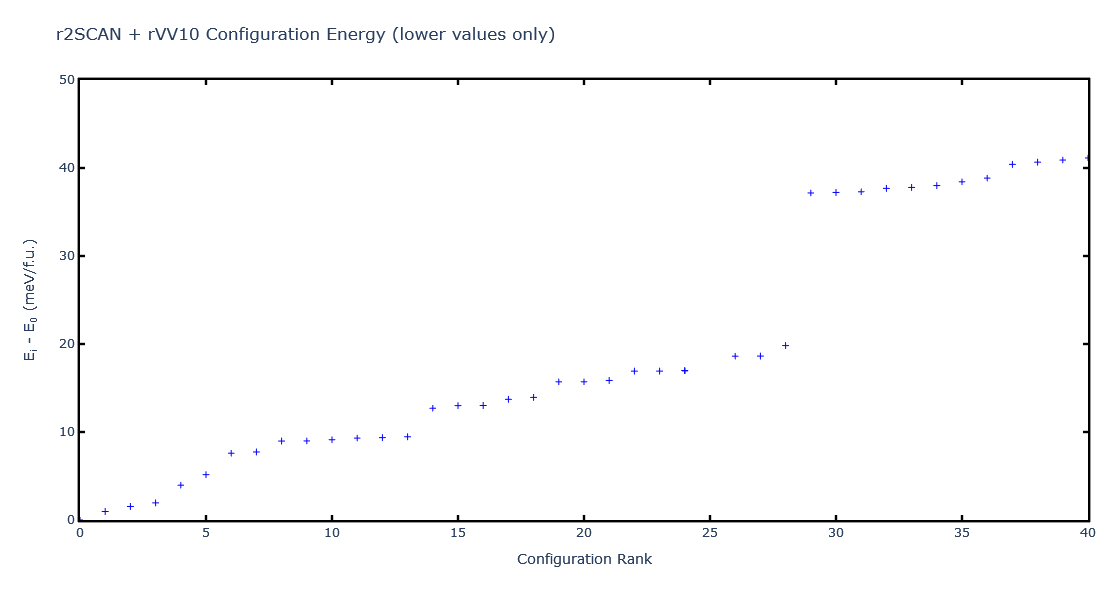

In [52]:
import importlib
importlib.reload(eos_fit)
fig = config_plot = eos_fit.plot_config_energy(df, number_of_lowest_configs=1000, show_fig=False, xmax = 40, ymax = 50)
fig.update_layout(title_text='r2SCAN + rVV10 Configuration Energy (lower values only)',
                 yaxis_title_font=dict(size=18),
                 yaxis_title='E<sub>i</sub> - E<sub>0</sub> (meV/f.u.)',
                 )


      volume config      energy  number_of_atoms  energy_per_atom  \
0       84.0      1  -57.243889              2.0       -28.621945   
4      336.0    100 -230.295530              8.0       -28.786941   
12     336.0    101 -230.112770              8.0       -28.764096   
20     336.0    102 -230.743850              8.0       -28.842981   
28     336.0    103 -230.124920              8.0       -28.765615   
...      ...    ...         ...              ...              ...   
3016   336.0     95 -229.715770              8.0       -28.714471   
3024   336.0     96 -230.062790              8.0       -28.757849   
3032   336.0     97 -229.857550              8.0       -28.732194   
3040   336.0     98 -230.107280              8.0       -28.763410   
3048   336.0     99 -230.271250              8.0       -28.783906   

      relative_energy  
0           340.99050  
4           175.99375  
12          198.83875  
20          119.95375  
28          197.32000  
...               ...  
301

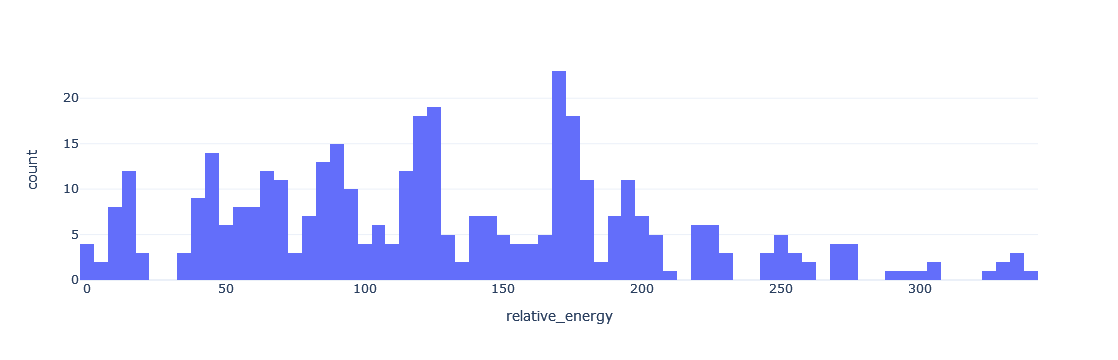

In [22]:
import importlib
importlib.reload(eos_fit)
fig = eos_fit.plot_energy_histogram(df, nbins=100, show_fig=True)


In [23]:
df = workflows.remove_magmom_data(df)
df = workflows.append_energy_per_atom(df)
lowest = workflows.get_lowest_atomic_energy_configs(df, number_of_lowest=37)
print(lowest[lowest['config'] == '176'])


     volume config     energy  number_of_atoms  energy_per_atom
428   336.0    176 -231.39266              8.0       -28.924083


In [32]:
import importlib
import prep_for_vasp as p4v
importlib.reload(p4v)
p4v.set_up_ev_from_fixed_volume_calculations(lowest, '/storage/home/lam7027/work/FeSe/16_atoms_or_less/configurations', '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations')

Error processing configuration '8': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_8'
Error processing configuration '9': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_9'
Error processing configuration '8': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_8'
Error processing configuration '9': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_9'
Error processing configuration '8': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_8'
Error processing configuration '9': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_9'
Error processing configuration '574': [Errno 17] File exists: '/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_574'
Error processing configuration

In [50]:
import prep_for_vasp as p4v

In [34]:
p4v.make_kpoints(14000, configurations_directory='/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations')

In [53]:
import subprocess
lowest_sorted = lowest.sort_values('energy_per_atom')
cut_off_energy = lowest_sorted.loc[lowest_sorted['config'] == '368', 'energy_per_atom']
filtered_df = lowest_sorted[lowest_sorted['energy_per_atom'] > cut_off_energy.values[0]]

for config in filtered_df['config'].unique():
    directory = f'/storage/home/lam7027/work/FeSe/16_atoms_or_less_ev/configurations/config_{config}'
    subprocess.run(['sbatch', 'run_vasp'], cwd=directory, check=True)

Submitted batch job 9367799
Submitted batch job 9367800
Submitted batch job 9367801
Submitted batch job 9367802
Submitted batch job 9367803
Submitted batch job 9367804
Submitted batch job 9367805
Submitted batch job 9367806
Submitted batch job 9367807
Submitted batch job 9367808
Submitted batch job 9367809
Submitted batch job 9367810
Submitted batch job 9367811
Submitted batch job 9367812
Submitted batch job 9367813
Submitted batch job 9367814
Submitted batch job 9367815
Submitted batch job 9367816
Submitted batch job 9367817
Submitted batch job 9367818
Submitted batch job 9367819
Submitted batch job 9367820
Submitted batch job 9367821
Submitted batch job 9367822
Submitted batch job 9367823
Submitted batch job 9367824
Submitted batch job 9367825
